# IT Academy - Data Science with Python
## S06 T01: Sampling Methods
### [Github Sampling Methods](https://github.com/jesussantana/Sampling)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Sampling.svg)](https://wakatime.com/badge/github/jesussantana/Sampling)

## Create Project Structure

In [1]:
# pip install cookiecutter
# cookiecutter -c v1 https://github.com/jesussantana/cookiecutter-data-science

In [2]:
from IPython.display import Image

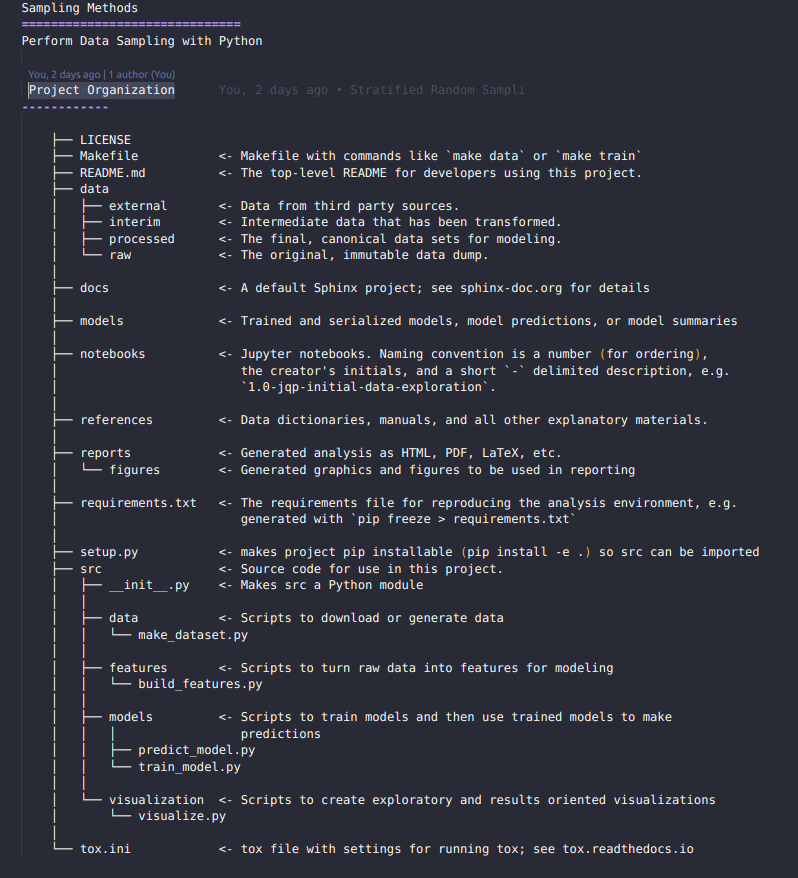

In [3]:
Image("../reports/figures/Project_Organization.png")

### Exercise 1:  

  - Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.

In [4]:
# Data treatment
# ==============================================================================
import numpy as np
import pandas as pd
import datetime
import time
from tabulate import tabulate

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats.mstats import gmean,hmean

from imblearn.over_sampling import SMOTE

from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt import gp_minimize
from skopt.plots import plot_convergence

# Various
# ==============================================================================
import multiprocessing
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Scripts folder configuration
# ==============================================================================
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

In [5]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/MLB.txt'

df_raw= pd.read_table(path+file)

In [6]:
df = df_raw.copy()
df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [7]:
df.tail()

,player,team,position,salary
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0
827,Willy Taveras,Washington Nationals,Outfielder,400.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [9]:
df.shape

(828, 4)

In [10]:
df.isna().sum().sort_values()

player      0
team        0
position    0
salary      0
dtype: int64

## Distribution of the response variable

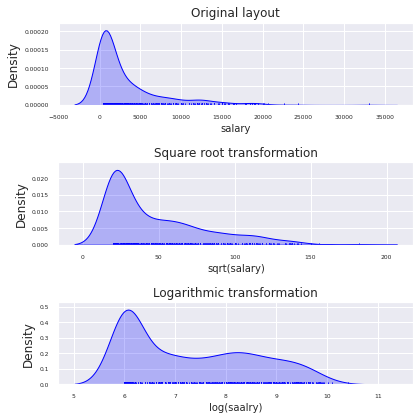

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    df.salary,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('salary', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.salary),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(salary)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.salary),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(salary)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [12]:
df.describe().round(2)

,salary
count,828.00
mean,3281.83
std,4465.45
min,400.00
25%,418.32
50%,1093.75
75%,4250.00
max,33000.00


In [13]:
df.describe(include=['object'])

,player,team,position
count,828,828,828
unique,828,30,9
top,Sean Burnett,Oakland Athletics,Pitcher
freq,1,31,410


In [14]:
df.position.unique()

array(['Pitcher', 'Catcher', 'First Baseman', 'Outfielder', 'Shortstop',
       'Second Baseman', 'Third Baseman', 'Designated Hitter',
       'Infielder'], dtype=object)

In [15]:
df.position.value_counts()

Pitcher              410
Outfielder           148
Catcher               67
Shortstop             56
Second Baseman        48
Third Baseman         46
First Baseman         42
Designated Hitter      7
Infielder              4
Name: position, dtype: int64

In [16]:
# Store the real mean
real_mean = round(df.salary.mean(),3)
print(f"Real Mean is {real_mean} ")

Real Mean is 3281.828 


In [17]:
df

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0
...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0


### Simple Random Sample

In [18]:
simple_random_sample = df.sample(frac=0.1, replace=True, random_state=6858)

In [19]:
simple_random_sample.head()

,player,team,position,salary
566,Carlos Ruiz,Philadelphia Phillies,Catcher,1900.0
580,Zach Duke,Pittsburgh Pirates,Pitcher,4300.0
77,Craig Tatum,Baltimore Orioles,Catcher,400.0
327,Jose Guillen,Kansas City Royals,Outfielder,12000.0
581,Ryan Doumit,Pittsburgh Pirates,Catcher,3650.0


In [20]:
simple_random_sample.shape

(83, 4)

In [21]:
simple_random_mean = round(simple_random_sample.salary.mean(),3)
print(f"Simple Random Mean is {simple_random_mean}")
print(f"\nReal Mean is {real_mean}")

Simple Random Mean is 3621.331

Real Mean is 3281.828


In [22]:
abs(simple_random_sample.salary.mean()-real_mean)/simple_random_sample.salary.mean()*100

9.375079234754162

In [23]:
simple_random_sample.position.value_counts(normalize=True)

Pitcher           0.542169
Outfielder        0.204819
Shortstop         0.084337
Catcher           0.060241
Second Baseman    0.060241
First Baseman     0.024096
Third Baseman     0.024096
Name: position, dtype: float64

In [24]:
df.position.value_counts(normalize=True)

Pitcher              0.495169
Outfielder           0.178744
Catcher              0.080918
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.055556
First Baseman        0.050725
Designated Hitter    0.008454
Infielder            0.004831
Name: position, dtype: float64

In [25]:
simple_random_sample.to_csv('../data/interim/simple_random_sample.csv')

### Systematic Sampling

In [26]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    
    return systematic_sample

In [27]:
# Obtain a systematic sample
systematic_sample = systematic_sampling(df, 10)

In [28]:
# Save the sample mean
systematic_mean = round(systematic_sample.salary.mean(),3)
print(f"Sistematic Random Mean is {systematic_mean}")
print(f"\nReal Mean is {real_mean}")

Sistematic Random Mean is 3499.42

Real Mean is 3281.828


In [29]:
systematic_sample

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
30,Billy Wagner,Atlanta Braves,Pitcher,6750.0
40,Eric Hinske,Atlanta Braves,First Baseman,1000.0
...,...,...,...,...
780,Shawn Camp,Toronto Blue Jays,Pitcher,1150.0
790,Brandon Morrow,Toronto Blue Jays,Pitcher,409.8
800,Jason Marquis,Washington Nationals,Pitcher,7500.0
810,Sean Burnett,Washington Nationals,Pitcher,775.0


In [30]:
systematic_sample.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
10,Aaron Heilman,Arizona Diamondbacks,Pitcher,2150.0
20,Tony Abreu,Arizona Diamondbacks,Shortstop,407.0
30,Billy Wagner,Atlanta Braves,Pitcher,6750.0
40,Eric Hinske,Atlanta Braves,First Baseman,1000.0


In [31]:
systematic_sample.to_csv('../data/interim/systematic_sample.csv')

### Cluster Sampling

In [32]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")

In [33]:
# Obtain a cluster sample
cluster_sample = cluster_sampling(df, 6)

In [34]:
# Save the sample mean
cluster_mean = round(cluster_sample.salary.mean(),2)
print(f"Cluster Mean is {cluster_mean}")
print(f"\nReal Mean is {real_mean}")

Cluster Mean is 3135.24

Real Mean is 3281.828


In [35]:
cluster_sample

,player,team,position,salary,cluster_id
138,Alex Rios,Chicago White Sox,Outfielder,10200.0,2
139,Bobby Jenks,Chicago White Sox,Pitcher,7500.0,2
140,Juan Pierre,Chicago White Sox,Outfielder,7000.0,2
141,A.J. Pierzynski,Chicago White Sox,Catcher,6750.0,2
142,Scott Linebrink,Chicago White Sox,Pitcher,5000.0,2
...,...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0,6
824,Ian Desmond,Washington Nationals,Shortstop,400.0,6
825,Ross Detwiler,Washington Nationals,Pitcher,400.0,6
826,Jesse English,Washington Nationals,Pitcher,400.0,6


In [36]:
cluster_sample.shape

(414, 5)

In [37]:
cluster_sample.to_csv('../data/interim/cluster_sample.csv')

### Exercise 2: 
  - It continues with the sports theme data set and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).

### Stratified Random Sampling

In [38]:
# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=100)

In [39]:
# Perform data frame split
for x, y in split.split(df, df.position):
    stratified_random_sample = df.iloc[y]

In [40]:
type(stratified_random_sample)

pandas.core.frame.DataFrame

In [41]:
stratified_random_sample

,player,team,position,salary,cluster_id
311,Geoff Blum,Houston Astros,Second Baseman,1500.0,3
783,Jose Molina,Toronto Blue Jays,Catcher,800.0,6
595,Garrett Jones,Pittsburgh Pirates,Outfielder,425.0,5
345,Billy Butler,Kansas City Royals,First Baseman,470.0,3
817,Nyjer Morgan,Washington Nationals,Outfielder,426.5,6
...,...,...,...,...,...
796,Marc Rzepczynski,Toronto Blue Jays,Pitcher,404.0,6
576,Andrew Carpenter,Philadelphia Phillies,Pitcher,401.0,5
582,Octavio Dotel,Pittsburgh Pirates,Pitcher,3250.0,5
328,Zack Greinke,Kansas City Royals,Pitcher,7250.0,3


In [42]:
stratified_random_sample.groupby('position').mean()

,salary,cluster_id
position,,
Catcher,991.337500,4.125000
Designated Hitter,4100.000000,4.000000
First Baseman,4277.450600,4.600000
Outfielder,2946.350333,3.666667
Pitcher,3278.927000,3.326531
Second Baseman,4064.285667,3.833333
Shortstop,1031.914286,4.000000
Third Baseman,4562.666667,3.333333


In [43]:
stratified_random_sample.describe().round()


,salary,cluster_id
count,100.0,100.0
mean,3061.0,4.0
std,4137.0,2.0
min,400.0,1.0
25%,414.0,2.0
50%,1038.0,4.0
75%,4189.0,5.0
max,18875.0,6.0


In [44]:
stratified_random_sample.position.unique()

array(['Second Baseman', 'Catcher', 'Outfielder', 'First Baseman',
       'Pitcher', 'Third Baseman', 'Shortstop', 'Designated Hitter'],
      dtype=object)

In [45]:
stratified_random_sample.shape

(100, 5)

In [46]:
stratified_mean = round(stratified_random_sample.salary.mean())
print(f"Stratified Mean is {stratified_mean}")
print(f"\nReal Mean is {real_mean}")

Stratified Mean is 3061

Real Mean is 3281.828


In [47]:
abs(stratified_random_sample.salary.mean()-df.salary.mean())/stratified_random_sample.salary.mean()*100


7.212574982718676

In [48]:
stratified_random_sample.position.value_counts(normalize=True)

Pitcher              0.49
Outfielder           0.18
Catcher              0.08
Shortstop            0.07
Third Baseman        0.06
Second Baseman       0.06
First Baseman        0.05
Designated Hitter    0.01
Name: position, dtype: float64

In [49]:
stratified_random_sample.to_csv('../data/interim/stratified_random_sample.csv')

### SMOTE (Synthetic Minority Oversampling Technique)

In [50]:
# oversample
oversample = SMOTE(sampling_strategy='not majority', k_neighbors=3, random_state=6858)

In [51]:
player_over, position_over = oversample.fit_resample(df[['salary']], df[['position']])

In [52]:
position_over.value_counts()

position         
Catcher              410
Designated Hitter    410
First Baseman        410
Infielder            410
Outfielder           410
Pitcher              410
Second Baseman       410
Shortstop            410
Third Baseman        410
dtype: int64

In [53]:
player_over['position'] = position_over

In [54]:
stratified_SMOTE=(player_over.groupby('position').apply(lambda x: x.sample(n=100, random_state=6858)).reset_index(level=0, drop=True))

In [55]:
abs(stratified_SMOTE.salary.mean()-real_mean) / stratified_SMOTE.salary.mean()*100

0.8386615543679796

In [56]:
stratified_SMOTE.position.value_counts(normalize=True)

Shortstop            0.111111
Second Baseman       0.111111
Pitcher              0.111111
First Baseman        0.111111
Outfielder           0.111111
Infielder            0.111111
Catcher              0.111111
Third Baseman        0.111111
Designated Hitter    0.111111
Name: position, dtype: float64

In [57]:
stratified_SMOTE.to_csv('../data/interim/stratified_SMOTE.csv')

### Exercise 3: 
  - It continues with the sports theme dataset and generates a sample using the Reservoir sampling method.

### Reservoir Sampling Method

In [58]:
def reservoir_sampling(sample, population):
    reservoir = []

    for i in range(population):

        if i < sample:
            reservoir.append(i)

        else:
            j = rd.randint(0, i)
            if j < sample:
                reservoir[j] = i

    return reservoir

In [59]:
sample = int(len(df)*0.1)+1
population = len(df)
reservoir_sample_index = reservoir_sampling(sample, population)

In [60]:
population

828

In [61]:
sample

83

In [62]:
print(reservoir_sample_index)

[253, 827, 526, 278, 363, 534, 669, 120, 736, 390, 236, 703, 438, 429, 661, 597, 249, 297, 667, 531, 726, 319, 636, 712, 728, 574, 335, 813, 647, 663, 492, 569, 468, 400, 618, 417, 660, 578, 543, 39, 692, 354, 594, 276, 355, 107, 435, 717, 318, 668, 515, 460, 242, 306, 96, 132, 793, 320, 216, 411, 583, 61, 673, 446, 148, 142, 66, 605, 595, 773, 303, 772, 72, 768, 124, 129, 89, 781, 78, 791, 80, 81, 157]


In [63]:
reservoir_sample = df.iloc[reservoir_sample_index]

In [64]:
reservoir_mean = round(reservoir_sample.salary.mean())
reservoir_mean

3461

In [65]:
real_mean

3281.828

In [66]:
reservoir_sample.to_csv('../data/interim/reservoir_sample.csv')

## Data Summary

In [67]:
# Create a dictionary with the mean outcomes
outcomes = {'sample_mean':[simple_random_mean, systematic_mean, stratified_mean, cluster_mean, reservoir_mean ],'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling','Cluster Sampling', 'Reservoir Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Cluster Sampling,3135.240,3281.828,146.588
Reservoir Sampling,3461.000,3281.828,179.172
Systematic Sampling,3499.420,3281.828,217.592
Stratified Sampling,3061.000,3281.828,220.828
Simple Random Sampling,3621.331,3281.828,339.503


In [68]:
outcomes.to_csv('../data/processed/outcomes.csv')

Text(0.5, 0, 'Reservoir - Salary (millions of dollars) - ReservoirSample k=83')

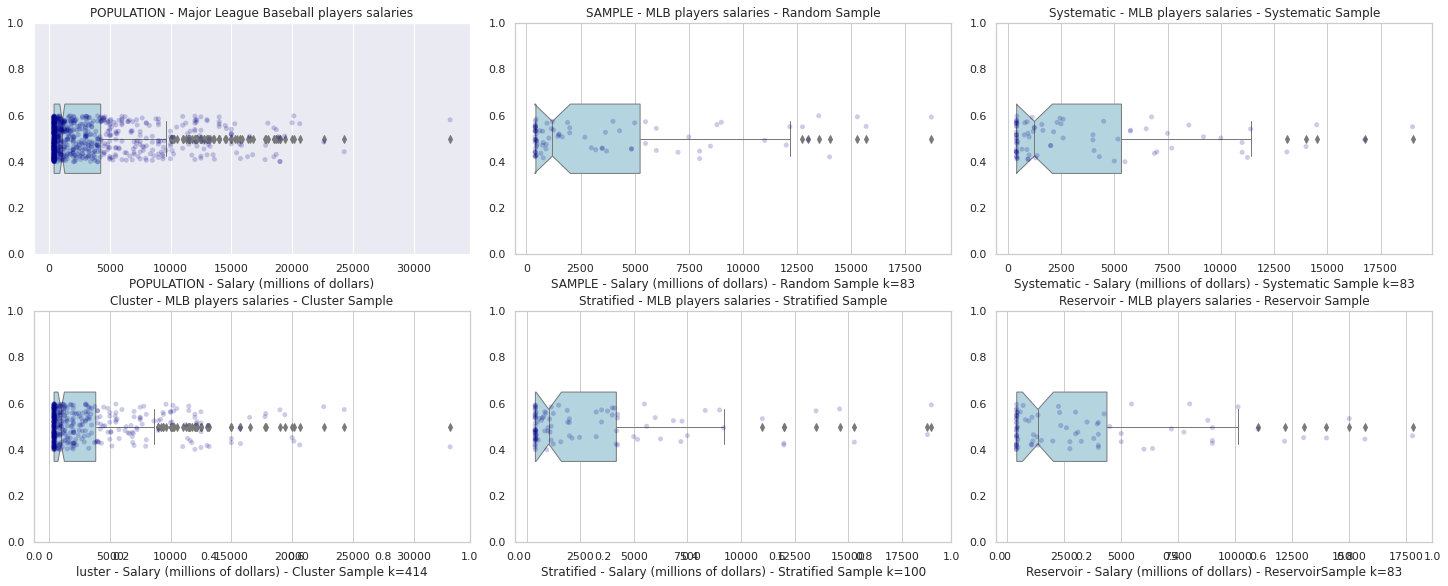

In [69]:
plt.rcParams['figure.constrained_layout.use'] = True
fig, axes = plt.subplots(2, 3, constrained_layout=True, sharex=True, figsize=(20,8))
#fig.tight_layout()
#fig= plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.9)

ax1 = fig.add_subplot(2, 3, 1)
# Plot
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax1 = sns.stripplot(x=df.salary, orient='v', color='darkblue', alpha=0.2)
plt.title('POPULATION - Major League Baseball players salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(2, 3, 2)
# Plot
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=simple_random_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax2 = sns.stripplot(x=simple_random_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'SAMPLE - MLB players salaries - Random Sample')
plt.xlabel(f'SAMPLE - Salary (millions of dollars) - Random Sample k={len(simple_random_sample)}')

ax3 = fig.add_subplot(2, 3, 3)
# Plot
sns.set(style="whitegrid")
ax3 = sns.boxplot(x=systematic_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax3 = sns.stripplot(x=systematic_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Systematic - MLB players salaries - Systematic Sample')
plt.xlabel(f'Systematic - Salary (millions of dollars) - Systematic Sample k={len(systematic_sample)}')

ax4 = fig.add_subplot(2, 3, 4)
# Plot
sns.set(style="whitegrid")
ax4 = sns.boxplot(x=cluster_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax4 = sns.stripplot(x=cluster_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Cluster - MLB players salaries - Cluster Sample')
plt.xlabel(f'luster - Salary (millions of dollars) - Cluster Sample k={len(cluster_sample)}')

ax5 = fig.add_subplot(2, 3, 5)
# Plot
sns.set(style="whitegrid")
ax5 = sns.boxplot(x=stratified_random_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax5 = sns.stripplot(x=stratified_random_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Stratified - MLB players salaries - Stratified Sample')
plt.xlabel(f'Stratified - Salary (millions of dollars) - Stratified Sample k={len(stratified_random_sample)}')

ax6 = fig.add_subplot(2, 3, 6)
# Plot
sns.set(style="whitegrid")
ax6 = sns.boxplot(x=reservoir_sample.salary, color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax6 = sns.stripplot(x=reservoir_sample.salary, orient='v', color='darkblue', alpha=0.2)
plt.title(f'Reservoir - MLB players salaries - Reservoir Sample')
plt.xlabel(f'Reservoir - Salary (millions of dollars) - ReservoirSample k={len(reservoir_sample)}')

In [70]:
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Population - MLB players',f'Random Sample k={len(simple_random_sample)}', f'Systematic Sample k={len(systematic_sample)}', f'Cluster Sample k={len(cluster_sample)}', f'Stratified Sample k={len(stratified_random_sample)}', f'Reservoir Sample k={len(reservoir_sample)}' ))

fig.add_trace(go.Violin(x=df.salary),row=1, col=1)

fig.add_trace(go.Violin(x=simple_random_sample.salary),row=1, col=2)

fig.add_trace(go.Violin(x=systematic_sample.salary),row=1, col=3)

fig.add_trace(go.Violin(x=cluster_sample.salary),row=2, col=1)

fig.add_trace(go.Violin(x=stratified_random_sample.salary),row=2, col=2)

fig.add_trace(go.Violin(x=reservoir_sample.salary),row=2, col=3)

fig.update_layout(height=500, width=1200,
                  title_text="Major League Baseball players salaries")

fig.show()

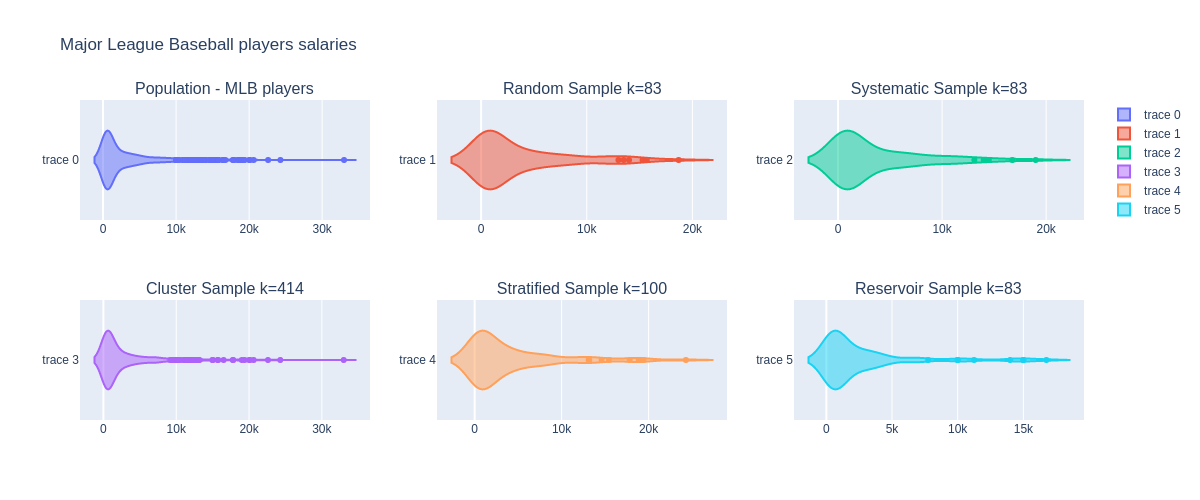

In [71]:
Image("../reports/figures/Major_League_Baseball_players_salaries.png")